In [13]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [24]:
yellow_cleaned = pd.read_feather('../preprocessed_data/yellow_cleaned.feather').drop('index', axis = 1)
yellow_cleaned["income"] = yellow_cleaned['tip_amount'] + yellow_cleaned['fare_amount']
yellow_cleaned['revenue'] = yellow_cleaned['income'] / yellow_cleaned['duration']

yellow_cleaned['pickup_hour'] = yellow_cleaned['pickup_hour'].astype('category')
yellow_cleaned['payment_type'] = yellow_cleaned['payment_type'].astype('category')
yellow_cleaned

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_date,duration,pickup_hour,income,revenue
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,...,0.5,2.00,0.0,0.3,15.30,2017-01-09,12.283333,11,14.50,1.180461
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,...,0.5,1.45,0.0,0.3,7.25,2017-01-09,3.566667,11,6.45,1.808411
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,...,0.5,1.00,0.0,0.3,7.30,2017-01-09,3.750000,11,6.50,1.733333
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,...,0.5,1.70,0.0,0.3,8.50,2017-01-09,5.383333,11,7.70,1.430341
4,2,2017-01-01 00:00:02,2017-01-01 00:39:22,4,7.75,1,N,186,36,1,...,0.5,4.66,0.0,0.3,27.96,2017-01-01,39.333333,0,26.66,0.677797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18539355,1,2017-03-31 23:58:06,2017-03-31 23:59:56,1,0.50,1,N,231,231,1,...,0.5,0.95,0.0,0.3,5.75,2017-03-31,1.833333,23,4.45,2.427273
18539356,1,2017-03-31 23:58:39,2017-03-31 23:59:44,1,0.30,1,N,100,100,1,...,0.5,0.70,0.0,0.3,5.00,2017-03-31,1.083333,23,3.70,3.415385
18539357,1,2017-03-31 23:58:42,2017-03-31 23:59:48,1,0.30,1,N,90,90,1,...,0.5,1.25,0.0,0.3,5.55,2017-03-31,1.100000,23,4.25,3.863636
18539358,2,2017-03-31 23:59:18,2017-03-31 23:59:18,5,4.71,1,N,142,202,1,...,0.5,4.16,0.0,0.3,24.96,2017-03-31,0.000000,23,23.66,inf


In [4]:
weather = pd.read_csv("../raw_data/weather.csv")

In [ ]:
def add_weather(weather, date, time):
    return weather.loc[date][time]

df['weather'] = df[['pickup_date','pickup_hour']].apply(
    lambda x: add_weather(weather,x.iloc[0],x.iloc[1]), axis=1)

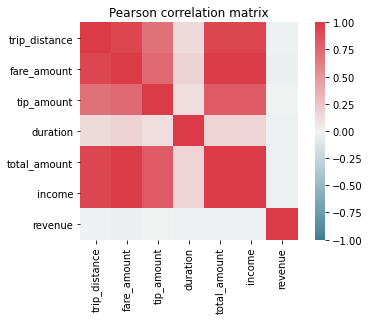

In [27]:
corr_attributes =['trip_distance','fare_amount','tip_amount', 'duration','total_amount', 'income', 'revenue']
corr = yellow_cleaned[corr_attributes].corr()
sns.heatmap(corr,cmap = sns.diverging_palette(220, 10, as_cmap=True), square=True, center=0, vmin=-1, vmax=1)
plt.title('Pearson correlation matrix')
plt.savefig('../plots/correlation.png')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(yellow_cleaned, train_size=12000000, random_state=60, shuffle=True)
train.reset_index(inplace = True, drop=True)
test.reset_index(inplace = True, drop=True)

OverflowError: cannot convert float infinity to integer

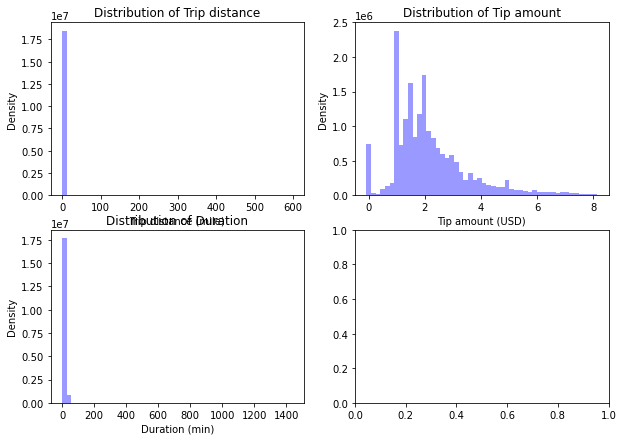

In [31]:
fig = plt.figure(figsize=(10, 7))
plt.subplot(221)  
sns.distplot(yellow_cleaned['trip_distance'], kde = False, label = "trip_distance", color ="blue") 
plt.title("Distribution of Trip distance")
plt.xlabel('Trip distance (mile)')
plt.ylabel("Density")

plt.subplot(222)
sns.distplot(yellow_cleaned['tip_amount'], kde = False, label = "tip_amount", color ="blue")
plt.title("Distribution of Tip amount")
plt.xlabel('Tip amount (USD)')
plt.ylabel("Density")

plt.subplot(223) 
sns.distplot(yellow_cleaned['duration'], kde = False, label = "duration", color ="blue")
plt.title("Distribution of Duration")
plt.xlabel('Duration (min)')
plt.ylabel("Density")

plt.subplot(224) 
sns.distplot(yellow_cleaned['revenue'], kde = False, label = "revenue", color ="blue")
plt.title("Distribution of Revenue")
plt.xlabel('Revenue (USD/hour)')
plt.ylabel("Density")

plt.tight_layout()
plt.show()